In [99]:
#from lib2to3.pytree import convert
import scipy.io
import numpy as np
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tinymlgen import port
import xml.etree.ElementTree as ET
import os
from tqdm import tqdm
import pandas as pd
import pybboxes as pbx
from collections import defaultdict
from tqdm import tqdm
import shutil
import cv2
import matplotlib.pyplot as plt
import math

In [100]:
x = np.load('C:\\Users\\poori\\x_low_gray.npy')
y = np.load('C:\\Users\\poori\\y_low_gray.npy')
print(np.shape(x))
print(np.shape(y))

(3169, 28, 28)
(3169,)


In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=4)
print("size of x_train is ", np.shape(x_train))
print("size of x_test is ", np.shape(x_test))

size of x_train is  (1901, 28, 28)
size of x_test is  (634, 28, 28)


Now, size of x_train is  (1901, 28, 28, 1)
Now, size of x_test is  (634, 28, 28, 1)


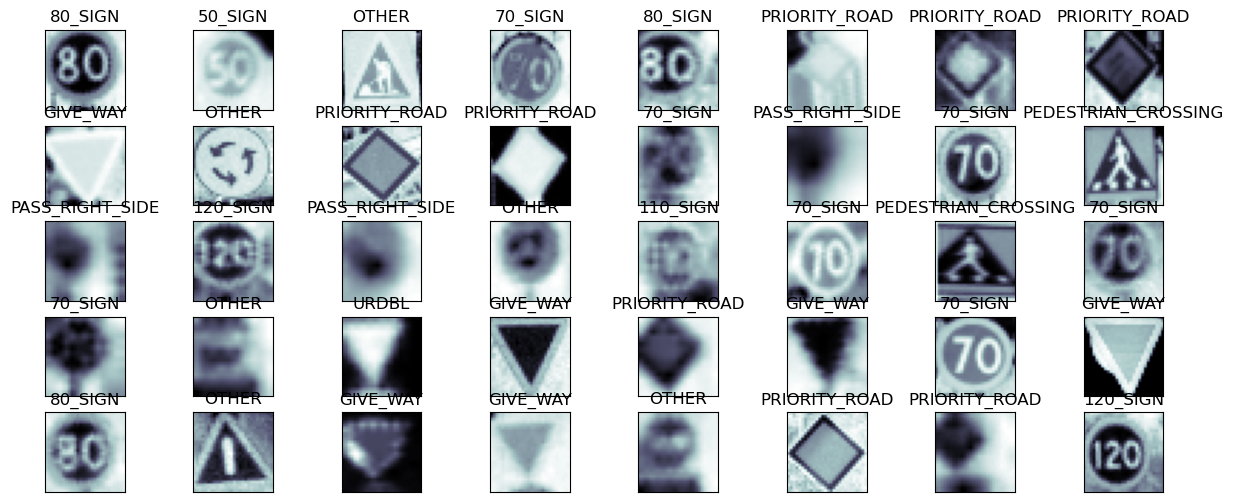

In [106]:
fig = plt.figure(figsize=(15,6)) #figure size is in inches.

for i in range(40):
 ax = fig.add_subplot(5,8, i+1, xticks=[], yticks=[])
 ax.imshow(x_train[i], cmap='bone_r')
 ax.set_title(y_train[i])
x_train = x_train.reshape((-1, x_train.shape[1], x_train.shape[2], 1))
print("Now, size of x_train is ", np.shape(x_train))

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
print("Now, size of x_test is ", np.shape(x_test))

In [117]:
model = Sequential([
    Conv2D(2, (3,3), activation='relu', input_shape=x_train.shape[1:]),
    MaxPool2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(14, activation='softmax') # probability
])

# text Description of model
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 13, 13, 2)         0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 13, 13, 2)         0         
                                                                 
 flatten_30 (Flatten)        (None, 338)               0         
                                                                 
 dense_44 (Dense)            (None, 100)               33900     
                                                                 
 dense_45 (Dense)            (None, 14)                1414      
                                                     

In [118]:
# define loss function and optimizer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(x_train, y_train, epochs=20, batch_size=50, verbose=2, validation_split=0.2)

Epoch 1/20


UnimplementedError: Graph execution error:

Detected at node Cast_1 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\poori\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\poori\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\poori\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\poori\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\poori\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\poori\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\poori\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\poori\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\poori\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\poori\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\poori\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\poori\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\poori\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\poori\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\poori\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\poori\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\poori\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\poori\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\poori\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\poori\AppData\Local\Temp\ipykernel_2460\3258078845.py", line 6, in <module>

  File "C:\Users\poori\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\poori\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\poori\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\poori\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\poori\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\poori\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1131, in train_step

  File "C:\Users\poori\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1225, in compute_metrics

  File "C:\Users\poori\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 620, in update_state

  File "C:\Users\poori\anaconda3\Lib\site-packages\keras\src\utils\metrics_utils.py", line 77, in decorated

  File "C:\Users\poori\anaconda3\Lib\site-packages\keras\src\metrics\base_metric.py", line 140, in update_state_fn

  File "C:\Users\poori\anaconda3\Lib\site-packages\keras\src\metrics\base_metric.py", line 708, in update_state

Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_train_function_23114]